# Lotka-Volterra learning curves

In [2]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

## Data

In [8]:
sample_sizes = [1000, 10000, 100000]
methods = ['maf', 'scandal']
method_labels = ['MAF', 'SCANDAL']
loss_labels = ['loss', 'loss_score']
n_methods = len(methods)

In [9]:
learning_curves_train = []
learning_curves_val = []

for method, loss_label in zip(methods, loss_labels):
    learning_curves_train_this_method = []
    learning_curves_val_this_method = []
    
    for sample_size in sample_sizes:
        sample_size_label = '' if sample_size is None else '_trainingsamplesize_' + str(sample_size)
        try:
            learning_curve_train = np.load('../../data/results/lotkavolterra/' + method
                                     + '/' + loss_label + '_train_model_zoom_mog' + sample_size_label + '.npy')
            learning_curve_val = np.load('../../data/results/lotkavolterra/' + method
                                     + '/' + loss_label + '_val_model_zoom_mog' + sample_size_label + '.npy')
        except FileNotFoundError:
            learning_curve_train = np.load('../../data/results/lotkavolterra/' + method
                                     + '/' + loss_label + '_trainmodel_zoom_mog' + sample_size_label + '.npy')
            learning_curve_val = np.load('../../data/results/lotkavolterra/' + method
                                     + '/' + loss_label + '_valmodel_zoom_mog' + sample_size_label + '.npy')
        
        learning_curves_train_this_method.append(learning_curve_train)
        learning_curves_val_this_method.append(learning_curve_val)
        
    learning_curves_train.append(learning_curves_train_this_method)
    learning_curves_val.append(learning_curves_val_this_method)
    
learning_curves_train = np.array(learning_curves_train)
learning_curves_val = np.array(learning_curves_val)


## Plot learning curves

In [10]:
colors = ['c','#CC002E','mediumblue']
linestyles = ['-', '--', '-.', ':'] * 2

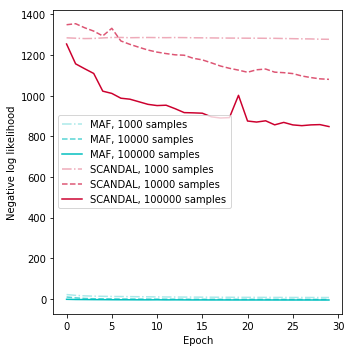

In [11]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()



for m, method in enumerate(method_labels):
    for s, sample_size in enumerate(sample_sizes):
        alpha = (s + 1) / len(sample_sizes)
        
        #plt.plot(learning_curves_train[m][s],
        #         c=colors[m], ls=' ', marker='o', ms=3., alpha=alpha)
        
        plt.plot(learning_curves_val[m][s],
                 c=colors[m], lw=1.5, ls=linestyles[len(sample_sizes) - s - 1], alpha=alpha,
                 label=method + ', ' + str(sample_size) + ' samples')

    plt.legend()

    plt.xlabel('Epoch')
    plt.ylabel('Negative log likelihood')
    #plt.ylim(-32.,20.)
    # plt.xlim(0,100)
        
    

plt.tight_layout()
plt.show()
